In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/camus-books/rawText.txt
/kaggle/input/camus-books/the myth of sisyphus.txt
/kaggle/input/kant-2/rawText.txt
/kaggle/input/the-castle/rawText.txt
/kaggle/input/kant-3/rawText.txt
/kaggle/input/camus-the-stranger-txt/rawText.txt
/kaggle/input/albert-camus-the-stranger-pdf/Albert Camus - The Stranger.pdf
/kaggle/input/metamorphos/rawText.txt
/kaggle/input/kant-feeling/rawText.txt
/kaggle/input/existantialism-is-humanism/rawText.txt
/kaggle/input/the-trial/rawText.txt
/kaggle/input/nausea/rawText.txt


In [2]:
# Import necessary libraries
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer

# Download resources needed for NLTK (run once if necessary)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
!yes | unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/



Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [4]:
def extract_text_from_txt(txt_file):
    with open(txt_file, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

In [5]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data packages are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize sentences first
    sentences = sent_tokenize(text)
    
    # Define stopwords and punctuation set
    stop_words = set(stopwords.words('english'))
    
    # Define filler words (as per your original list)
    filler_words = {'youve','yes','couldnt','im','call', 'upon', 'still', 'nevertheless', 'down', 
                   'every', 'forty', '‘re', 'always', 'whole', 'side',
                   "n't", 'now', 'however', 'an', 'show', 'least', 'give',
                   'below', 'did', 'sometimes', 'which', "'s", 'nowhere', 
                   'per', 'hereupon', 'yours', 'she', 'moreover', 'eight',
                   'somewhere', 'within', 'whereby', 'few', 'has', 'so', 
                   'have', 'for', 'noone', 'top', 'were', 'those', 'thence', 
                   'eleven', 'after', 'no', '’ll', 'others', 'ourselves',
                   'themselves', 'though', 'that', 'nor', 'just', '’s', 
                   'before', 'had', 'toward', 'another', 'should', 'herself',
                   'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed',
                   'bottom', 'anyone', 'his', 'each', 'then', 'both', 'became', 'third',
                   'whom', '‘ve', 'mine', 'take', 'many', 'anywhere', 'to', 'well',
                   'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards',
                   'none', 'be', 'herein', 'two', 'using', 'whatever', 'please',
                   'perhaps', 'full', 'ca', 'we', 'latterly', 'here', 'therefore',
                   'us', 'how', 'was', 'made', 'the', 'or', 'may', '’re', 'namely',
                   "'ve", 'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than',
                   'why', 'really', 'whither', 'in', 'only', 'wherein', 'last', 'under',
                   'own', 'therein', 'go', 'seems', '‘m', 'wherever', 'either',
                   'someone', 'up', 'doing', 'on', 'rather', 'ours', 'again',
                   'same', 'over', '‘s', 'latter', 'during', 'done', "'re", 'put',
                   "'m", 'much', 'neither', 'among', 'seemed', 'into', 'once', 'my', 
                   'otherwise', 'part', 'everywhere', 'never', 'myself', 'must', 'will',
                   'am', 'can', 'else', 'although', 'as', 'beyond', 'are', 'too',
                   'becomes', 'does', 'a', 'everyone', 'but', 'some', 'regarding',
                   '‘ll', 'against', 'throughout', 'yourselves', 'him', "'d", 'it',
                   'himself', 'whether', 'move', '’m', 'hereafter', 're', 'while',
                   'whoever', 'your', 'first', 'amount', 'twelve', 'serious', 'other',
                   'any', 'off', 'seeming', 'four', 'itself', 'nothing', 'beforehand',
                   'make', 'out', 'very', 'already', 'various', 'until', 'hers', 'they',
                   'not', 'them', 'where', 'would', 'since', 'everything', 'at', 'together',
                   'yet', 'more', 'six', 'back', 'with', 'thereupon', 'becoming', 'around',
                   'due', 'keep', 'somehow', 'n‘t', 'across', 'all', 'when', 'i', 'empty',
                   'nine', 'five', 'get', 'see', 'been', 'name', 'between', 'hence', 'ten',
                   'several', 'from', 'whereupon', 'through', 'hereby', "'ll", 'alone',
                   'something', 'formerly', 'without', 'above', 'onto', 'except', 'enough',
                   'become', 'behind', '’d', 'its', 'most', 'n’t', 'might', 'whereas',
                   'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby', 'twenty', 'often',
                   'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could', 'because',
                   'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards',
                   'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', '‘d', 
                   'say', 'thus', 'unless', 'along', 'yourself', 'former', 'thru', 'he', 
                   'hundred', 'three', 'sixty', 'me', 'sometime', 'whose', 'you', 'quite',
                   '’ve', 'about', 'even',"ive","id","didn't","got","youll","isnt","youre",
                    "didnt","wasnt","i","ii","iii","iv","v","vi","vii","iix","ix","x","xi","xii","xiiv","tion"
                   }

    # Initialize a list to store preprocessed sentences
    preprocessed_sentences = []
    
    for sentence in sentences:
        # Remove special characters and punctuation from the sentence
        sentence_clean = re.sub(r'[^\w\s]', '', sentence)
        
        # Tokenize each sentence into words
        tokens = word_tokenize(sentence_clean)
        
        # Lemmatize, remove stopwords, and remove filler words
        tokens = [
            lemmatizer.lemmatize(word) 
            for word in tokens 
            if word not in stop_words and word not in filler_words
        ]
        
        # Append the cleaned and lemmatized tokens to the result list
        preprocessed_sentences.append(tokens)
        
    return preprocessed_sentences

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
pdf_file = '/kaggle/input/camus-the-stranger-txt/rawText.txt'
    
# Extract text from the text file
print("Extracting text from text file...")
text = extract_text_from_txt(pdf_file)
    
# Preprocess the text
print("Preprocessing text...")
sentences = preprocess_text(text)

Extracting text from text file...
Preprocessing text...


In [7]:
# Train Word2Vec model on the preprocessed text
def train_word2vec(sentences):
    # Train the Word2Vec model (skip-gram model)
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)
    return model

In [8]:
def find_similar_words(model, target_words, top_n=20):
    all_similar_words = {}
    for target_word in target_words:
        try:
            similar_words = model.wv.most_similar(target_word, topn=top_n)
            all_similar_words[target_word] = similar_words
        except KeyError:
            all_similar_words[target_word] = []
    return all_similar_words


In [9]:
def aggregate_similar_words(similar_words,target_word):
    word_freq = {}

    word_freq[target_word] = 100  # You can adjust this frequency as needed

    """Aggregate similar words into a frequency dictionary."""
    word_freq = {}

    for target_word, similar in similar_words.items():
        for word, score in similar:
            # Use the score as frequency, or assign a default value (e.g., 1)
            word_freq[word] = word_freq.get(word, 0) + score  # Sum frequencies

    return word_freq

In [10]:
def create_wordcloud(word_freq,target_word):
    word_freq[target_word] = 100  # Adding "Love" with a high frequency

    # Create a custom color function
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word == target_word:
            return "black"  # Red for 'Love'
        else:
            # Create shades of red for similar words based on frequency
            # Ensure that shade values remain within 0-255
            shade = int(255 - (font_size * 200 / max(word_freq.values())))
            shade = max(0, min(255, shade))  # Clamp the value between 0 and 255
            return f"rgb(255, {shade}, {shade})"  # Shades of red

    # Generate the word cloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        color_func=color_func,
        prefer_horizontal=1.0
    ).generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


****Word Cloud for the stranger****

Extracting text from text file...
Preprocessing text...
Training Word2Vec model...
Finding words similar to target words...
Creating word cloud for death...


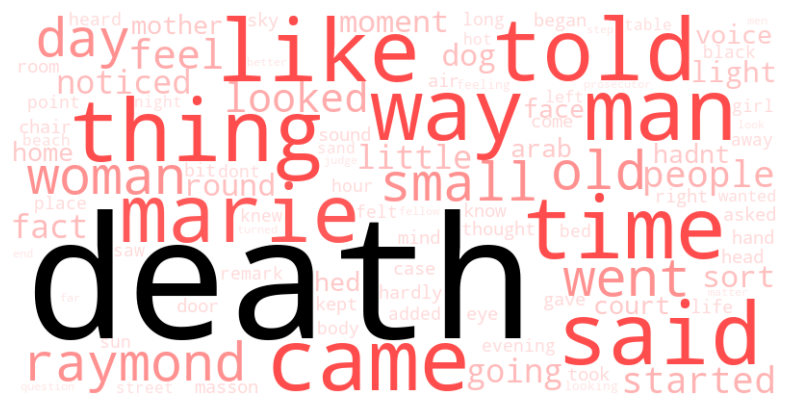

Creating word cloud for life...


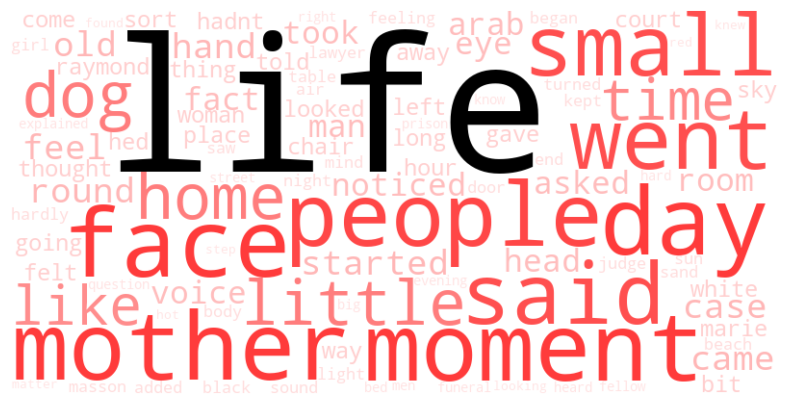

Creating word cloud for love...


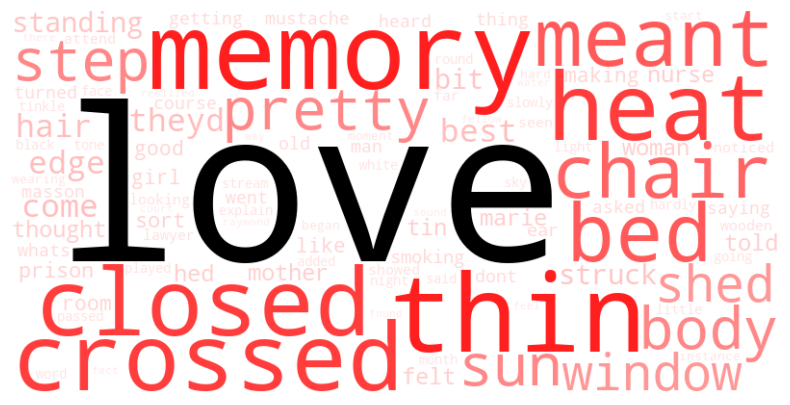

Creating word cloud for hate...


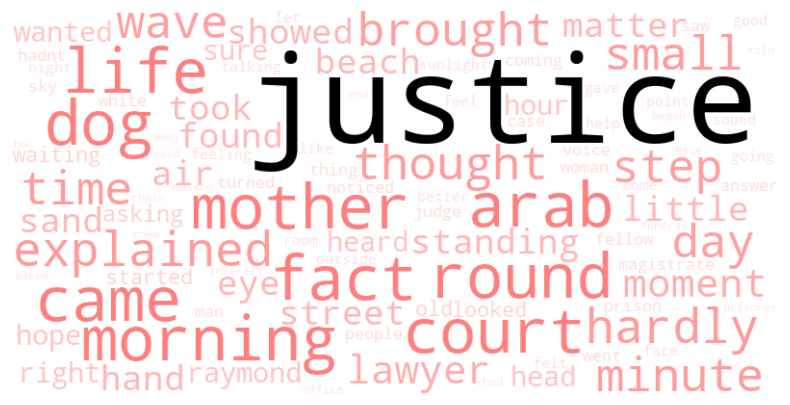

In [11]:
# Main function to run the program
def main():
    # Load the text file (change 'your_book.pdf' to your actual file path)
    pdf_file = '/kaggle/input/camus-the-stranger-txt/rawText.txt'
    
    # Extract text from the text file
    print("Extracting text from text file...")
    text = extract_text_from_txt(pdf_file)
    
    # Preprocess the text
    print("Preprocessing text...")
    sentences = preprocess_text(text)
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    model = train_word2vec(sentences)
    
    # Find words similar to target words
    print("Finding words similar to target words...")
    target_words = [
        "death","life","love","justice"
    ]
    death = [target_words[0]]
    life = [target_words[1]]
    love = [target_words[2]]
    hate = [target_words[3]]



    
    similar_words_death = find_similar_words(model, death, top_n=100)   
    word_freq_death = aggregate_similar_words(similar_words_death,death[0])
    
    similar_words_life = find_similar_words(model, life, top_n=100)   
    word_freq_life = aggregate_similar_words(similar_words_life,life[0])
    
    similar_words_love = find_similar_words(model, love, top_n=100)   
    word_freq_love = aggregate_similar_words(similar_words_love,love[0])
    
    similar_words_hate = find_similar_words(model, hate, top_n=100)   
    word_freq_hate = aggregate_similar_words(similar_words_hate,hate[0])
    
    # Create word cloud
    if similar_words_death:
        print("Creating word cloud for death...")
        create_wordcloud(word_freq_death,death[0])
    if similar_words_life:
        print("Creating word cloud for life...")
        create_wordcloud(word_freq_life,life[0])
    if similar_words_love:
        print("Creating word cloud for love...")
        create_wordcloud(word_freq_love,love[0])
    if similar_words_hate:
        print("Creating word cloud for hate...")
        create_wordcloud(word_freq_hate,hate[0])

# Run the main function
main()


**Word cloud for sisyphus**

Extracting text from text file...
Preprocessing text...
Training Word2Vec model...
Finding words similar to target words...
Creating word cloud for death...


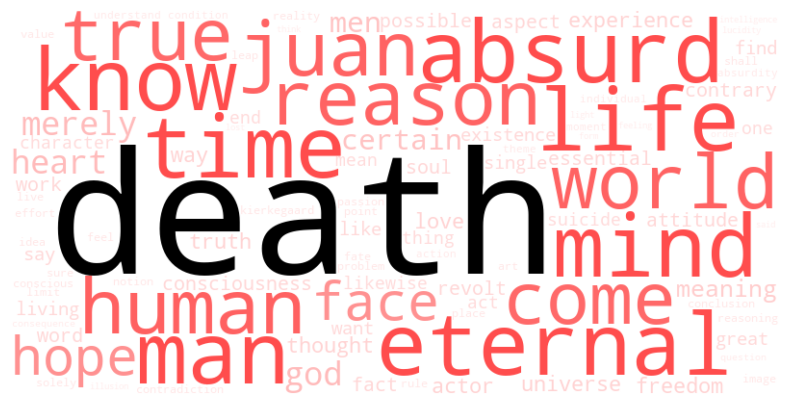

Creating word cloud for life...


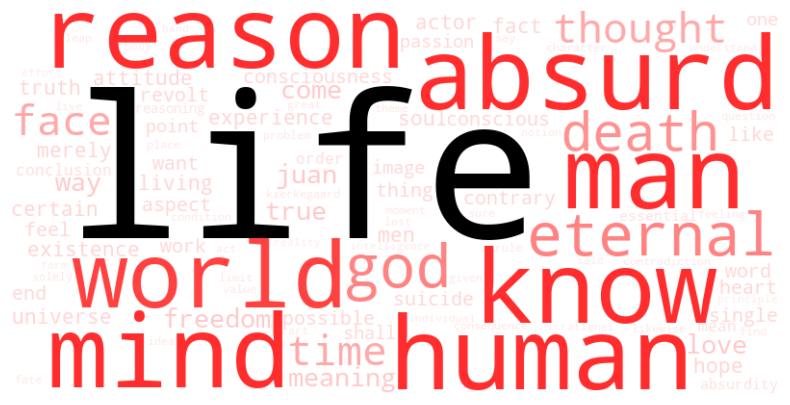

Creating word cloud for love...


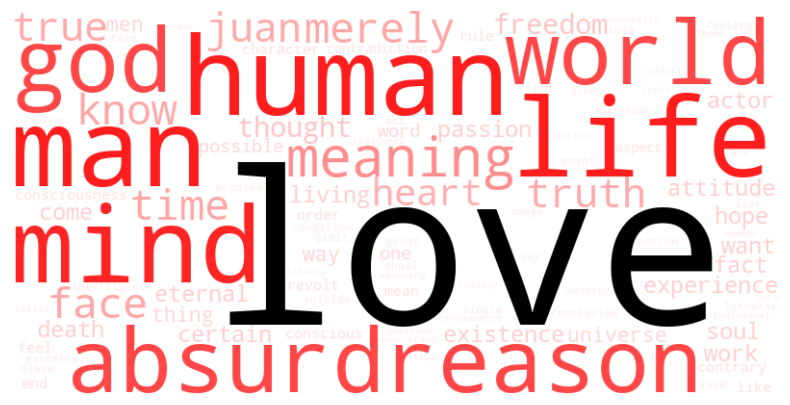

Creating word cloud for hate...


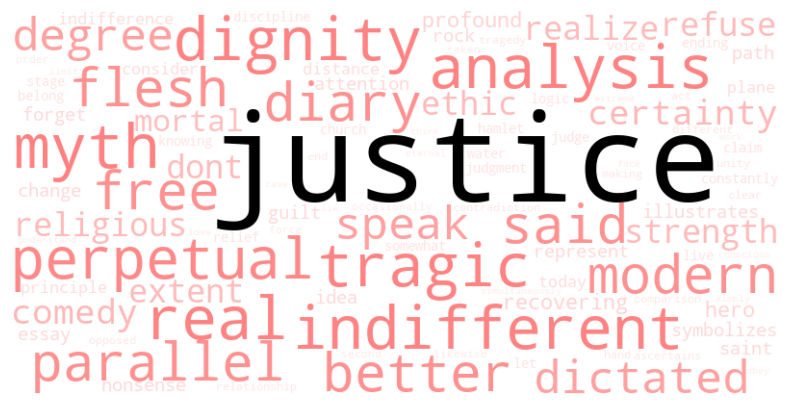

In [12]:
# Main function to run the program
def main():
    # Load the text file (change 'your_book.pdf' to your actual file path)
    pdf_file = '/kaggle/input/camus-books/the myth of sisyphus.txt'
    
    # Extract text from the text file
    print("Extracting text from text file...")
    text = extract_text_from_txt(pdf_file)
    
    # Preprocess the text
    print("Preprocessing text...")
    sentences = preprocess_text(text)
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    model = train_word2vec(sentences)
    
    # Find words similar to target words
    print("Finding words similar to target words...")
    target_words = [
        "death","life","love","justice"
    ]
    death = [target_words[0]]
    life = [target_words[1]]
    love = [target_words[2]]
    hate = [target_words[3]]



    
    similar_words_death = find_similar_words(model, death, top_n=100)   
    word_freq_death = aggregate_similar_words(similar_words_death,death[0])
    
    similar_words_life = find_similar_words(model, life, top_n=100)   
    word_freq_life = aggregate_similar_words(similar_words_life,life[0])
    
    similar_words_love = find_similar_words(model, love, top_n=100)   
    word_freq_love = aggregate_similar_words(similar_words_love,love[0])
    
    similar_words_hate = find_similar_words(model, hate, top_n=100)   
    word_freq_hate = aggregate_similar_words(similar_words_hate,hate[0])
    
    # Create word cloud
    if similar_words_death:
        print("Creating word cloud for death...")
        create_wordcloud(word_freq_death,death[0])
    if similar_words_life:
        print("Creating word cloud for life...")
        create_wordcloud(word_freq_life,life[0])
    if similar_words_love:
        print("Creating word cloud for love...")
        create_wordcloud(word_freq_love,love[0])
    if similar_words_hate:
        print("Creating word cloud for hate...")
        create_wordcloud(word_freq_hate,hate[0])

# Run the main function
main()


**Word cloud for the plague**

Extracting text from text file...
Preprocessing text...
Training Word2Vec model...
Finding words similar to target words...
Creating word cloud for death...


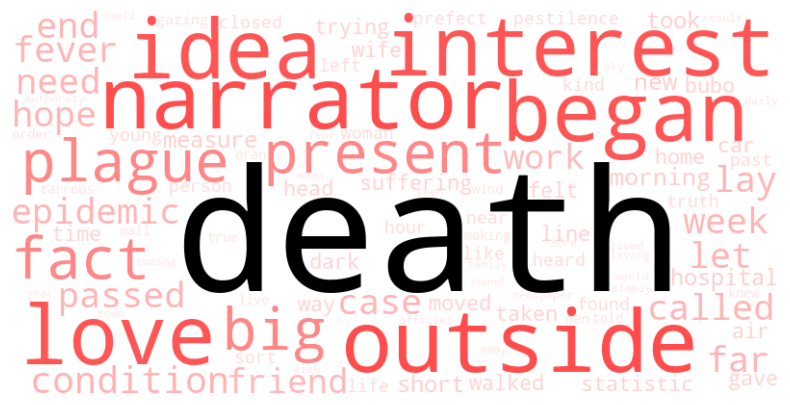

Creating word cloud for life...


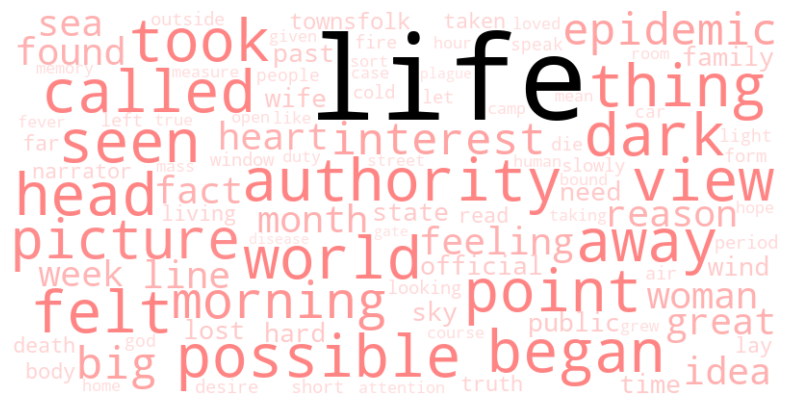

Creating word cloud for love...


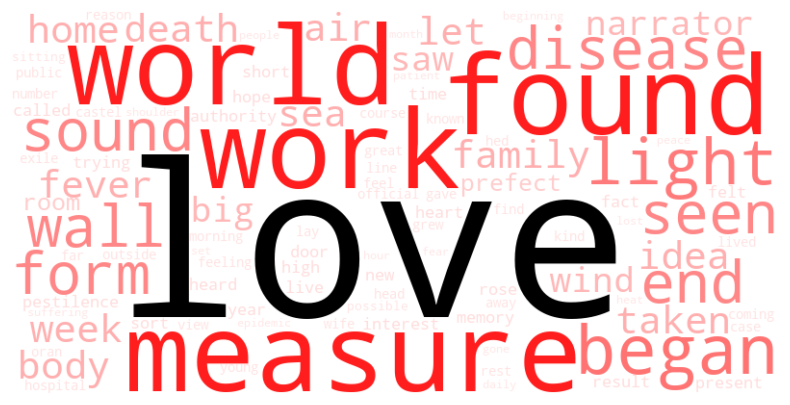

Creating word cloud for hate...


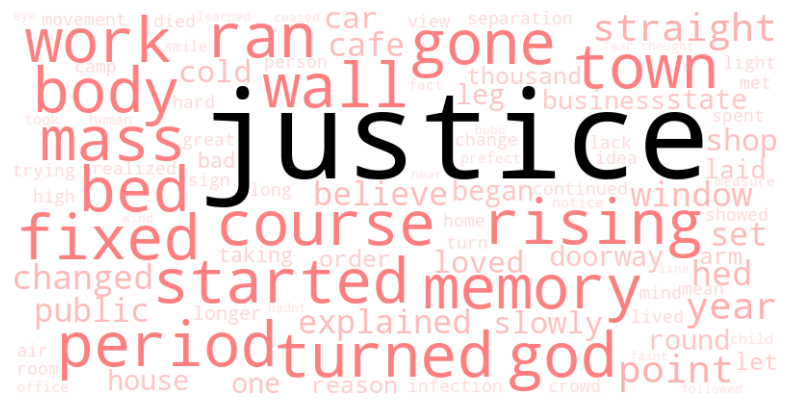

In [13]:
# Main function to run the program
def main():
    # Load the text file (change 'your_book.pdf' to your actual file path)
    pdf_file = '/kaggle/input/camus-books/rawText.txt'
    
    # Extract text from the text file
    print("Extracting text from text file...")
    text = extract_text_from_txt(pdf_file)
    
    # Preprocess the text
    print("Preprocessing text...")
    sentences = preprocess_text(text)
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    model = train_word2vec(sentences)
    
    # Find words similar to target words
    print("Finding words similar to target words...")
    target_words = [
        "death","life","love","justice"
    ]
    death = [target_words[0]]
    life = [target_words[1]]
    love = [target_words[2]]
    hate = [target_words[3]]



    
    similar_words_death = find_similar_words(model, death, top_n=100)   
    word_freq_death = aggregate_similar_words(similar_words_death,death[0])
    
    similar_words_life = find_similar_words(model, life, top_n=100)   
    word_freq_life = aggregate_similar_words(similar_words_life,life[0])
    
    similar_words_love = find_similar_words(model, love, top_n=100)   
    word_freq_love = aggregate_similar_words(similar_words_love,love[0])
    
    similar_words_hate = find_similar_words(model, hate, top_n=100)   
    word_freq_hate = aggregate_similar_words(similar_words_hate,hate[0])
    
    # Create word cloud
    if similar_words_death:
        print("Creating word cloud for death...")
        create_wordcloud(word_freq_death,death[0])
    if similar_words_life:
        print("Creating word cloud for life...")
        create_wordcloud(word_freq_life,life[0])
    if similar_words_love:
        print("Creating word cloud for love...")
        create_wordcloud(word_freq_love,love[0])
    if similar_words_hate:
        print("Creating word cloud for hate...")
        create_wordcloud(word_freq_hate,hate[0])

# Run the main function
main()


Extracting text from text file...
Preprocessing text...
Training Word2Vec model...
Finding words similar to target words...
Creating word cloud for death...


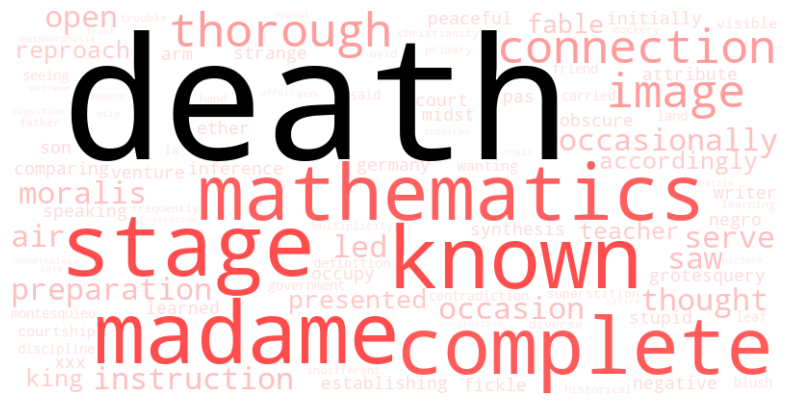

Creating word cloud for life...


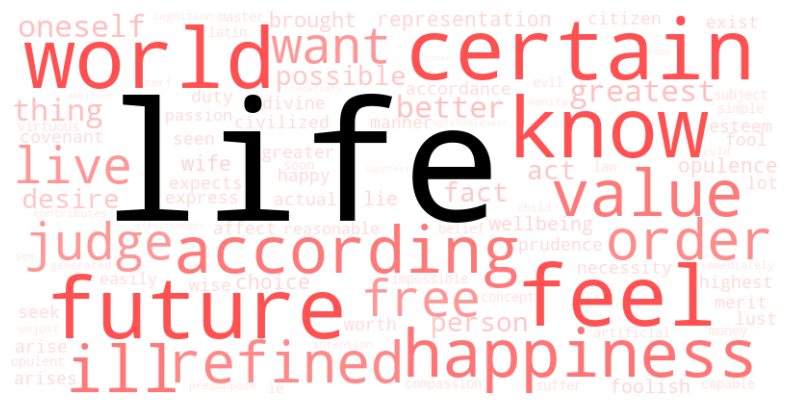

Creating word cloud for love...


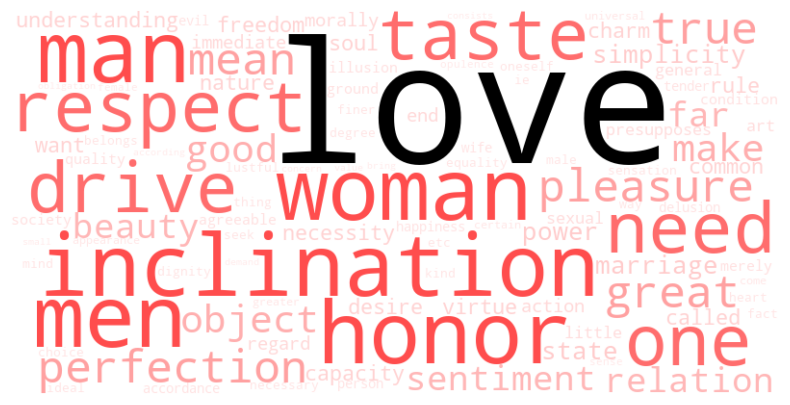

Creating word cloud for hate...


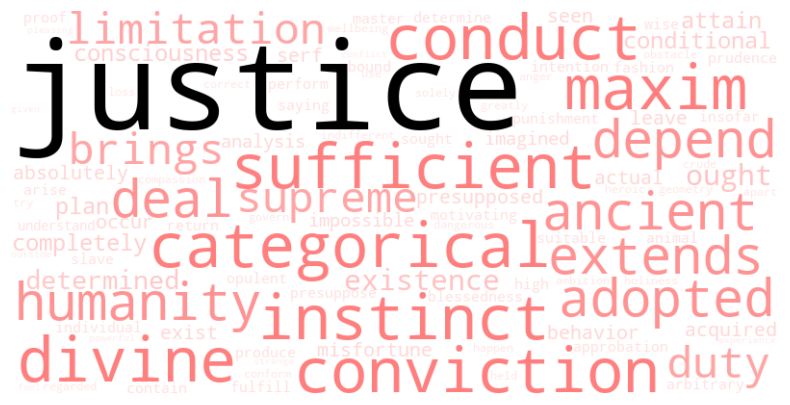

In [14]:
# Main function to run the program
def main():
    # Load the text file (change 'your_book.pdf' to your actual file path)
    pdf_file = '/kaggle/input/kant-feeling/rawText.txt'
    
    # Extract text from the text file
    print("Extracting text from text file...")
    text = extract_text_from_txt(pdf_file)
    
    # Preprocess the text
    print("Preprocessing text...")
    sentences = preprocess_text(text)
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    model = train_word2vec(sentences)
    
    # Find words similar to target words
    print("Finding words similar to target words...")
    target_words = [
        "death","life","love","justice"
    ]
    death = [target_words[0]]
    life = [target_words[1]]
    love = [target_words[2]]
    hate = [target_words[3]]



    
    similar_words_death = find_similar_words(model, death, top_n=100)   
    word_freq_death = aggregate_similar_words(similar_words_death,death[0])
    
    similar_words_life = find_similar_words(model, life, top_n=100)   
    word_freq_life = aggregate_similar_words(similar_words_life,life[0])
    
    similar_words_love = find_similar_words(model, love, top_n=100)   
    word_freq_love = aggregate_similar_words(similar_words_love,love[0])
    
    similar_words_hate = find_similar_words(model, hate, top_n=100)   
    word_freq_hate = aggregate_similar_words(similar_words_hate,hate[0])
    
    # Create word cloud
    if similar_words_death:
        print("Creating word cloud for death...")
        create_wordcloud(word_freq_death,death[0])
    if similar_words_life:
        print("Creating word cloud for life...")
        create_wordcloud(word_freq_life,life[0])
    if similar_words_love:
        print("Creating word cloud for love...")
        create_wordcloud(word_freq_love,love[0])
    if similar_words_hate:
        print("Creating word cloud for hate...")
        create_wordcloud(word_freq_hate,hate[0])

# Run the main function
main()


Extracting text from text file...
Preprocessing text...
Training Word2Vec model...
Finding words similar to target words...
Creating word cloud for death...


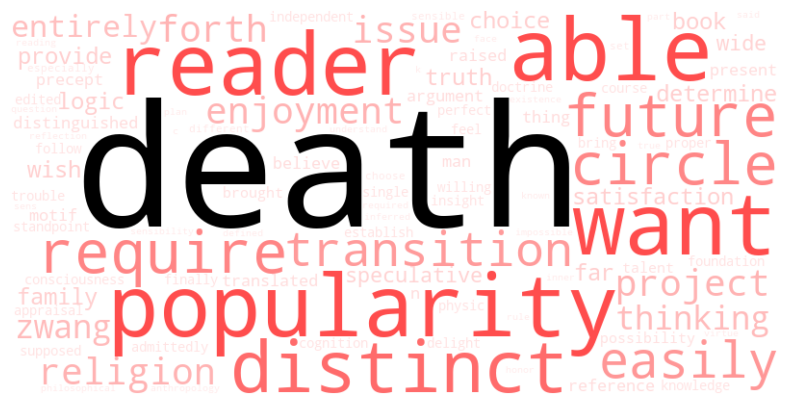

Creating word cloud for life...


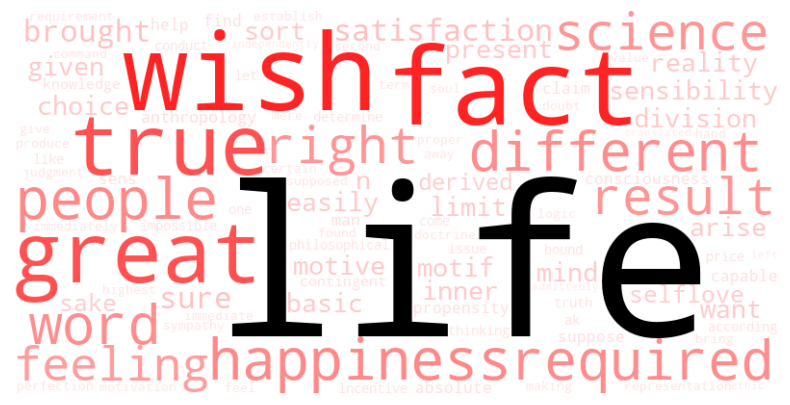

Creating word cloud for love...


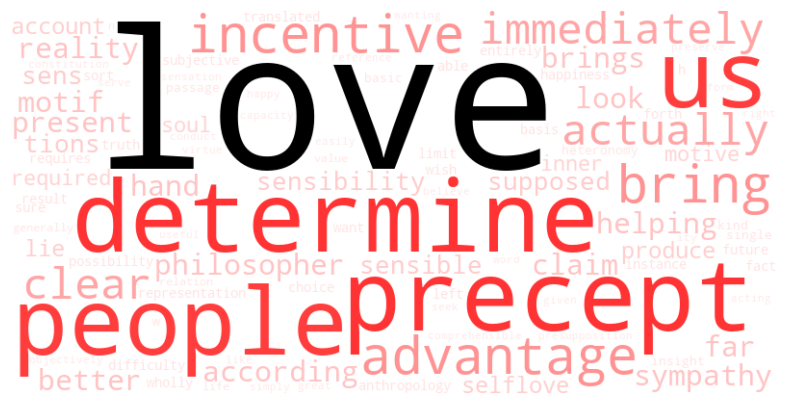

Creating word cloud for hate...


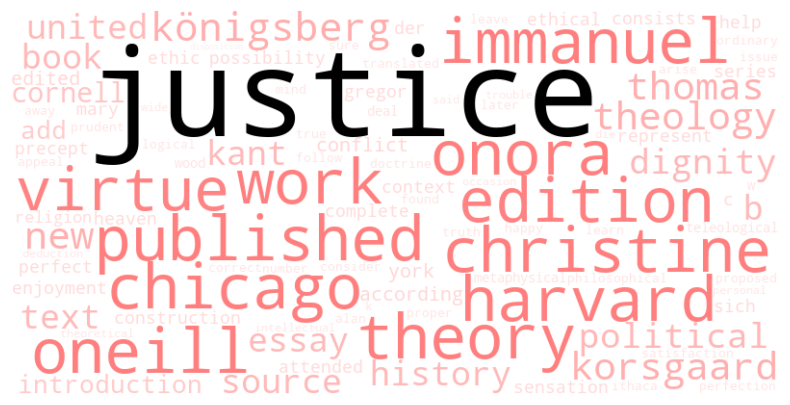

In [15]:
# Main function to run the program
def main():
    # Load the text file (change 'your_book.pdf' to your actual file path)
    pdf_file = '/kaggle/input/kant-2/rawText.txt'
    
    # Extract text from the text file
    print("Extracting text from text file...")
    text = extract_text_from_txt(pdf_file)
    
    # Preprocess the text
    print("Preprocessing text...")
    sentences = preprocess_text(text)
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    model = train_word2vec(sentences)
    
    # Find words similar to target words
    print("Finding words similar to target words...")
    target_words = [
        "death","life","love","justice"
    ]
    death = [target_words[0]]
    life = [target_words[1]]
    love = [target_words[2]]
    hate = [target_words[3]]



    
    similar_words_death = find_similar_words(model, death, top_n=100)   
    word_freq_death = aggregate_similar_words(similar_words_death,death[0])
    
    similar_words_life = find_similar_words(model, life, top_n=100)   
    word_freq_life = aggregate_similar_words(similar_words_life,life[0])
    
    similar_words_love = find_similar_words(model, love, top_n=100)   
    word_freq_love = aggregate_similar_words(similar_words_love,love[0])
    
    similar_words_hate = find_similar_words(model, hate, top_n=100)   
    word_freq_hate = aggregate_similar_words(similar_words_hate,hate[0])
    
    # Create word cloud
    if similar_words_death:
        print("Creating word cloud for death...")
        create_wordcloud(word_freq_death,death[0])
    if similar_words_life:
        print("Creating word cloud for life...")
        create_wordcloud(word_freq_life,life[0])
    if similar_words_love:
        print("Creating word cloud for love...")
        create_wordcloud(word_freq_love,love[0])
    if similar_words_hate:
        print("Creating word cloud for hate...")
        create_wordcloud(word_freq_hate,hate[0])

# Run the main function
main()


Extracting text from text file...
Preprocessing text...
Training Word2Vec model...
Finding words similar to target words...
Creating word cloud for death...


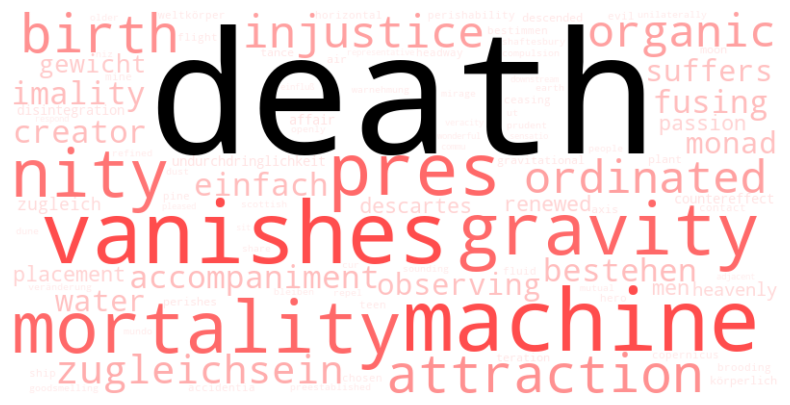

Creating word cloud for life...


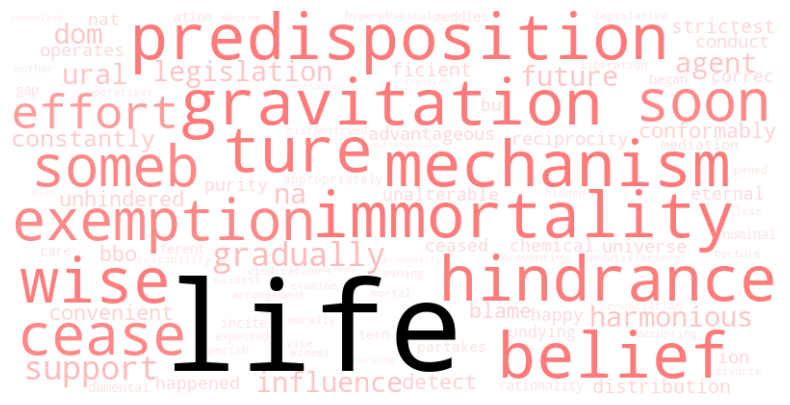

Creating word cloud for love...


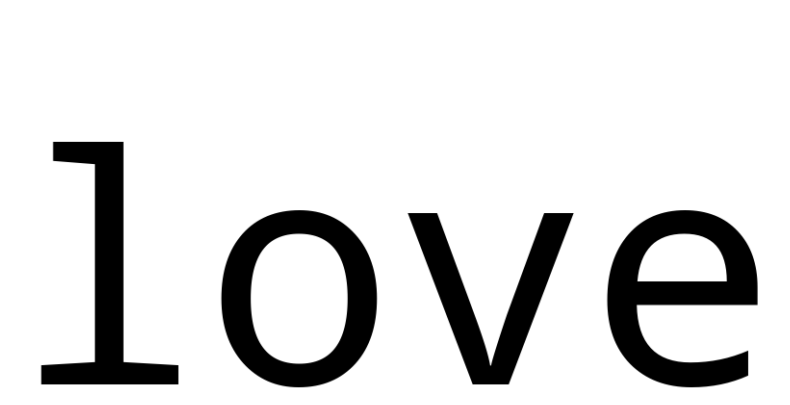

Creating word cloud for hate...


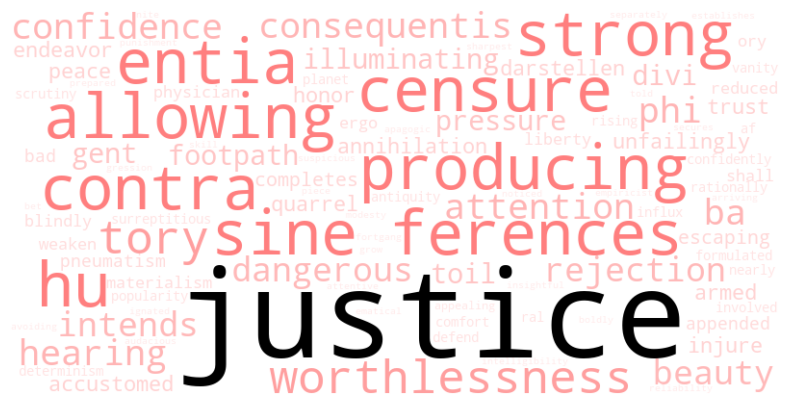

In [16]:
# Main function to run the program
def main():
    # Load the text file (change 'your_book.pdf' to your actual file path)
    pdf_file = '/kaggle/input/kant-3/rawText.txt'
    
    # Extract text from the text file
    print("Extracting text from text file...")
    text = extract_text_from_txt(pdf_file)
    
    # Preprocess the text
    print("Preprocessing text...")
    sentences = preprocess_text(text)
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    model = train_word2vec(sentences)
    
    # Find words similar to target words
    print("Finding words similar to target words...")
    target_words = [
        "death","life","love","justice"
    ]
    death = [target_words[0]]
    life = [target_words[1]]
    love = [target_words[2]]
    hate = [target_words[3]]



    
    similar_words_death = find_similar_words(model, death, top_n=100)   
    word_freq_death = aggregate_similar_words(similar_words_death,death[0])
    
    similar_words_life = find_similar_words(model, life, top_n=100)   
    word_freq_life = aggregate_similar_words(similar_words_life,life[0])
    
    similar_words_love = find_similar_words(model, love, top_n=100)   
    word_freq_love = aggregate_similar_words(similar_words_love,love[0])
    
    similar_words_hate = find_similar_words(model, hate, top_n=100)   
    word_freq_hate = aggregate_similar_words(similar_words_hate,hate[0])
    
    # Create word cloud
    if similar_words_death:
        print("Creating word cloud for death...")
        create_wordcloud(word_freq_death,death[0])
    if similar_words_life:
        print("Creating word cloud for life...")
        create_wordcloud(word_freq_life,life[0])
    if similar_words_love:
        print("Creating word cloud for love...")
        create_wordcloud(word_freq_love,love[0])
    if similar_words_hate:
        print("Creating word cloud for hate...")
        create_wordcloud(word_freq_hate,hate[0])

# Run the main function
main()


Extracting text from text file...
Preprocessing text...
Training Word2Vec model...
Finding words similar to target words...
Creating word cloud for death...


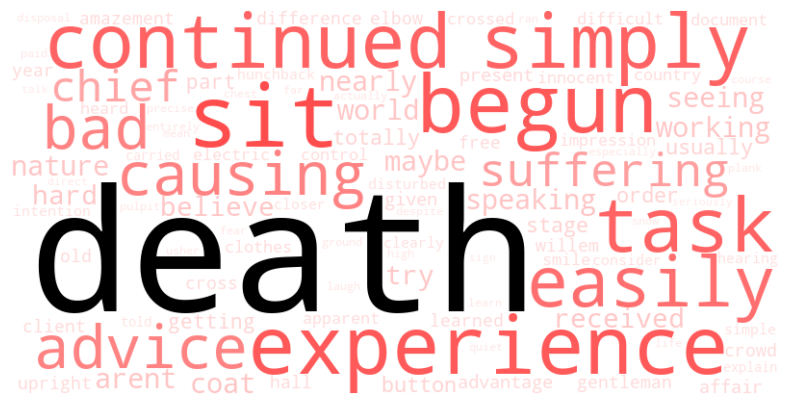

Creating word cloud for life...


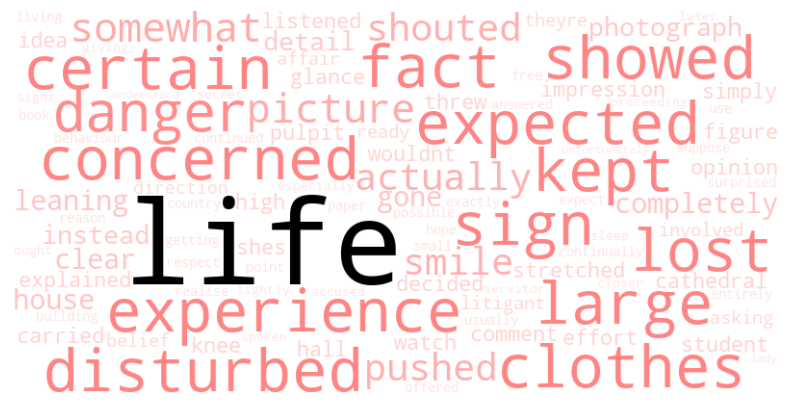

Creating word cloud for love...


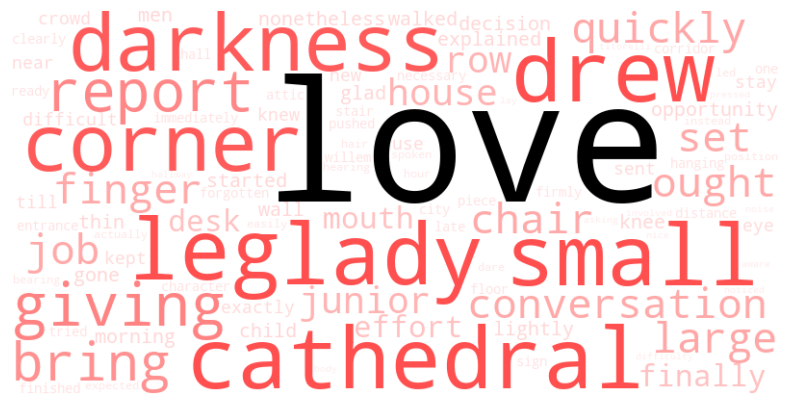

Creating word cloud for hate...


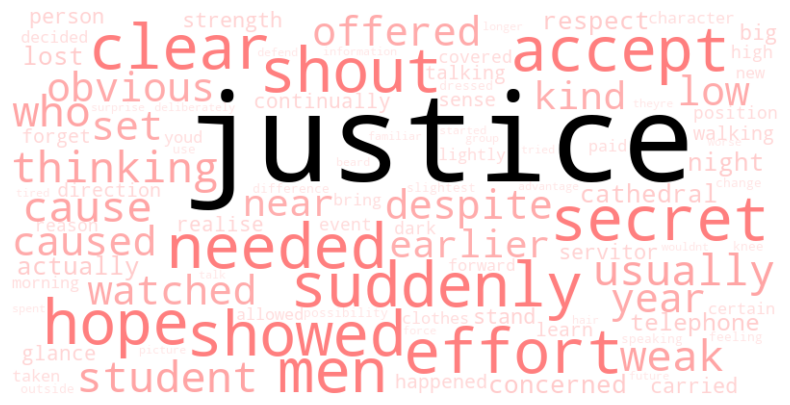

In [17]:
# Main function to run the program
def main():
    # Load the text file (change 'your_book.pdf' to your actual file path)
    pdf_file = '/kaggle/input/the-trial/rawText.txt'
    
    # Extract text from the text file
    print("Extracting text from text file...")
    text = extract_text_from_txt(pdf_file)
    
    # Preprocess the text
    print("Preprocessing text...")
    sentences = preprocess_text(text)
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    model = train_word2vec(sentences)
    
    # Find words similar to target words
    print("Finding words similar to target words...")
    target_words = [
        "death","life","love","justice"
    ]
    death = [target_words[0]]
    life = [target_words[1]]
    love = [target_words[2]]
    hate = [target_words[3]]



    
    similar_words_death = find_similar_words(model, death, top_n=100)   
    word_freq_death = aggregate_similar_words(similar_words_death,death[0])
    
    similar_words_life = find_similar_words(model, life, top_n=100)   
    word_freq_life = aggregate_similar_words(similar_words_life,life[0])
    
    similar_words_love = find_similar_words(model, love, top_n=100)   
    word_freq_love = aggregate_similar_words(similar_words_love,love[0])
    
    similar_words_hate = find_similar_words(model, hate, top_n=100)   
    word_freq_hate = aggregate_similar_words(similar_words_hate,hate[0])
    
    # Create word cloud
    if similar_words_death:
        print("Creating word cloud for death...")
        create_wordcloud(word_freq_death,death[0])
    if similar_words_life:
        print("Creating word cloud for life...")
        create_wordcloud(word_freq_life,life[0])
    if similar_words_love:
        print("Creating word cloud for love...")
        create_wordcloud(word_freq_love,love[0])
    if similar_words_hate:
        print("Creating word cloud for hate...")
        create_wordcloud(word_freq_hate,hate[0])

# Run the main function
main()


In [18]:
!pip install mpltern

In [19]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import mpltern  # Ensure mpltern is installed
from gensim.models import Word2Vec
import re
import os

# Ensure you have downloaded the necessary NLTK corpora
nltk.download('wordnet')
nltk.download('punkt')  # Added for tokenization if used in preprocess_text

# Assume the following helper functions are defined elsewhere and remain unchanged:
# extract_text_from_txt, preprocess_text, train_word2vec, find_similar_words

# Define your books with their file paths and authors
books = {
    "The Stranger": {
        "path": '/kaggle/input/camus-the-stranger-txt/rawText.txt',
        "author": "Albert Camus"
    },
    "The Plague": {
        "path": '/kaggle/input/camus-books/rawText.txt',
        "author": "Albert Camus"
    },
    "The Myth of Sisyphus": {
        "path": '/kaggle/input/camus-books/the myth of sisyphus.txt',
        "author": "Albert Camus"
    },
    "Observations on the Feeling of the Beautiful and Sublime": {
        "path": "/kaggle/input/kant-feeling/rawText.txt",
        "author": "Immanuel Kant"
    },
    "Groundwork of the Metaphysics of Morals": {
        "path": '/kaggle/input/kant-2/rawText.txt',
        "author": "Immanuel Kant"
    },
    "Critique of Pure Reason": {
        "path": "/kaggle/input/kant-3/rawText.txt",
        "author": "Immanuel Kant"
    },
    "Metamorphosis": {  # New Book
        "path": "/kaggle/input/metamorphos/rawText.txt",
        "author": "Franz Kafka"
    },
    "The Trial": {  # New Book
        "path": "/kaggle/input/the-trial/rawText.txt",
        "author": "Franz Kafka"
    },
    "The Castle": {  # New Book
        "path": "/kaggle/input/the-castle/rawText.txt",
        "author": "Franz Kafka"
    },
    "Nausea": {  # New Book
        "path": "/kaggle/input/nausea/rawText.txt",
        "author": "Jean-Paul Sartre"
    },
    "Existentialism is Humanism": {  # New Book
        "path": "/kaggle/input/existantialism-is-humanism/rawText.txt",
        "author": "Jean-Paul Sartre"
    }
}

# Define target concepts, updated to include "justice" and replace "love" with "life"
target_concepts = ["death", "justice","life"]

# Check if all files exist, including the three new books
print("Checking if all required files exist...")
missing_files = []
for book, info in books.items():
    file_path = info["path"]
    if not os.path.isfile(file_path):
        missing_files.append(file_path)

if missing_files:
    for file in missing_files:
        print(f"Error: Required file not found: {file}")
    raise FileNotFoundError("One or more required files are missing. Please check the paths.")
else:
    print("All files found.")

# Extract and preprocess texts
print("\nExtracting and preprocessing texts...")
processed_texts = {}
for book, info in books.items():
    print(f"Processing '{book}'...")
    text = extract_text_from_txt(info["path"])
    sentences = preprocess_text(text)
    processed_texts[book] = sentences

print("All texts extracted and preprocessed.")

# Train Word2Vec models once for each book
print("\nTraining Word2Vec models...")
word2vec_models = {}
for book, sentences in processed_texts.items():
    print(f"Training Word2Vec model for '{book}'...")
    model = train_word2vec(sentences)
    word2vec_models[book] = model

print("All Word2Vec models trained.")

# Initialize a dictionary to hold distances, including the three new books
distance_data = {
    "Concept": target_concepts
}

# Add each book as a key with an empty list to store distances
for book in books.keys():
    distance_data[book] = []

# Compute distances for each concept
print("\nComputing distances for each concept and book...")
for concept in target_concepts:
    print(f"\nProcessing concept: '{concept}'")
    
    for book, model in word2vec_models.items():
        # Check if the concept exists in the model's vocabulary
        if concept not in model.wv.key_to_index:
            print(f"Warning: '{concept}' not found in the vocabulary of '{book}'. Skipping distance computation for this concept in this book.")
            distance_data[book].append(np.nan)  # Use NaN to indicate missing data
            continue
        
        # Find similar words
        print(f"Finding words similar to '{concept}' in '{book}'...")
        similar_words = find_similar_words(model, [concept], top_n=100)
        
        # Extract similar words
        similar_word_tuples = similar_words.get(concept, [])
        if not similar_word_tuples:
            print(f"No similar words found for '{concept}' in '{book}'.")
            distance_data[book].append(np.nan)
            continue
        
        # Get the concept vector
        concept_vector = model.wv[concept]
        
        euclidean_distances = []
        for word, _ in similar_word_tuples:
            if word in model.wv.key_to_index:
                word_vector = model.wv[word]
                distance = np.linalg.norm(concept_vector - word_vector)
                euclidean_distances.append(distance)
            else:
                print(f"Warning: '{word}' not found in the vocabulary of '{book}'. Skipping this word.")
        
        if not euclidean_distances:
            print(f"No valid Euclidean distances computed for '{concept}' in '{book}'.")
            distance_data[book].append(np.nan)
            continue
        
        # Compute average Euclidean distance
        average_distance = np.mean(euclidean_distances)
        
        # Append the result
        distance_data[book].append(average_distance)
        
        print(f"Average Euclidean distance for '{concept}' in '{book}': {average_distance:.4f}")

print("\nDistance computations completed.")

# Convert to DataFrame
df_distance = pd.DataFrame(distance_data)
print("\nDistance DataFrame:")
print(df_distance)

# Prepare data for the ternary plot
# Instead of using pivot, we'll directly construct df_books_distance
print("\nPreparing data for plotting...")

df_books_distance = pd.DataFrame({
    'Book': list(books.keys()),
    'Death': [df_distance.loc[df_distance['Concept'] == 'death', book].values[0] for book in books.keys()],
    'Justice': [df_distance.loc[df_distance['Concept'] == 'justice', book].values[0] for book in books.keys()],
    'Life': [df_distance.loc[df_distance['Concept'] == 'life', book].values[0] for book in books.keys()]

})

print("\nBooks Distance for Plotting:")
print(df_books_distance)

# Assign authors to each book
book_authors = {book: info["author"] for book, info in books.items()}
df_books_distance['Author'] = df_books_distance['Book'].map(book_authors)

# Define color palettes for each author
author_colors = {
    "Albert Camus": ["#08306b", "#2171b5", "#6baed6"],          # Shades of Blue
    "Immanuel Kant": ["#a50f15", "#de2d26", "#fb6a4a"],        # Shades of Red
    "Franz Kafka": ["#006d2c", "#31a354", "#74c476"],          # Shades of Green
    "Jean-Paul Sartre": ["#000000", "#36454F", "#343434"]      # Shades of Black for Sartre
}

# Assign specific colors to each book based on the author
def assign_color(row):
    author = row['Author']
    book = row['Book']
    if author in author_colors:
        if author == "Albert Camus":
            if book == "The Stranger":
                return author_colors[author][0]  # Dark Blue
            elif book == "The Plague":
                return author_colors[author][1]  # Medium Blue
            elif book == "The Myth of Sisyphus":
                return author_colors[author][2]  # Light Blue
        elif author == "Immanuel Kant":
            if book == "Observations on the Feeling of the Beautiful and Sublime":
                return author_colors[author][0]  # Dark Red
            elif book == "Groundwork of the Metaphysics of Morals":
                return author_colors[author][1]  # Medium Red
            elif book == "Critique of Pure Reason":
                return author_colors[author][2]  # Light Red
        elif author == "Franz Kafka":
            if book == "Metamorphosis":
                return author_colors[author][0]  # Dark Green
            elif book == "The Trial":
                return author_colors[author][1]  # Medium Green
            elif book == "The Castle":
                return author_colors[author][2]  # Light Green
        elif author == "Jean-Paul Sartre":
            if book == "Nausea":
                return author_colors[author][0]  # Black
            elif book == "Existentialism is Humanism":
                return author_colors[author][1]  # Gray
    return "#636EFA"  # Default color for unknown authors or unspecified books

# Apply the color assignment
df_books_distance['Color'] = df_books_distance.apply(assign_color, axis=1)

print("\nBooks Distance with Authors and Colors:")
print(df_books_distance)

# Normalize the distance scores so that Death + Life + Justice = 1 for each book
print("\nNormalizing distance scores...")
df_books_distance[['Death','Justice' , 'Life']] = df_books_distance[['Death', 'Life', 'Justice']].div(
    df_books_distance[['Death','Justice' , 'Life']].sum(axis=1), axis=0
)

# Handle potential NaN values by filling them with zeros or another appropriate value
df_books_distance.fillna(0, inplace=True)

print("\nNormalized Books Distance for Plotting:")
print(df_books_distance)

# Plotting using Plotly Express
import plotly.express as px

print("\nGenerating ternary plot...")
fig = px.scatter_ternary(
    df_books_distance,
    title="Semantic Distances of Camus', Kant's, Kafka's,\n and Sartre's Works on Death, Life, and Justice",
    b="Death", 
    a="Justice",
    c="Life", 

    hover_name="Book",  # Hover to show book name
    hover_data=["Author"],  # Show author on hover
    color="Book",  # Use the assigned color column with hex codes
    color_discrete_sequence=df_books_distance["Color"].tolist(),  # Ensures hex codes are used in order
    size=[10]*len(df_books_distance),  # Uniform size; adjust as needed
    size_max=10,  # Max size for scaling
)

# Adjust the layout to give more room for the title
fig.update_layout(
    title_font_size=18,  # You can adjust the size of the title
    margin=dict(t=100),  # Adjust top margin for more space
)

fig.show()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Checking if all required files exist...
All files found.

Extracting and preprocessing texts...
Processing 'The Stranger'...
Processing 'The Plague'...
Processing 'The Myth of Sisyphus'...
Processing 'Observations on the Feeling of the Beautiful and Sublime'...
Processing 'Groundwork of the Metaphysics of Morals'...
Processing 'Critique of Pure Reason'...
Processing 'Metamorphosis'...
Processing 'The Trial'...
Processing 'The Castle'...
Processing 'Nausea'...
Processing 'Existentialism is Humanism'...
All texts extracted and preprocessed.

Training Word2Vec models...
Training Word2Vec model for 'The Stranger'...
Training Word2Vec model for 'The Plague'...
Training Word2Vec model for 'The Myth of Sisyphus'...
Training Word2Vec model for 'Observations on t

In [20]:
df_books_distance

Book     Death   Justice  \
0                                        The Stranger  0.335642  0.177216   
1                                          The Plague  0.214916  0.196173   
2                                The Myth of Sisyphus  0.249410  0.529878   
3   Observations on the Feeling of the Beautiful a...  0.382527  0.393727   
4             Groundwork of the Metaphysics of Morals  0.501926  0.142467   
5                             Critique of Pure Reason  0.410678  0.390307   
6                                       Metamorphosis  0.671563  0.328437   
7                                           The Trial  0.612819  0.090802   
8                                          The Castle  0.165387  0.197102   
9                                              Nausea  0.165307  0.250002   
10                         Existentialism is Humanism  0.505794  0.494206   

        Life            Author    Color  
0   0.487142      Albert Camus  #08306b  
1   0.588911      Albert Camus  #2171b5  
2   0.220712      Albert Camus  #6baed6  
3   0.223747     Immanuel Kant  #a50f15  
4   0.355608     Immanuel Kant  #de2d26  
5   0.199015     Immanuel Kant  #fb6a4a  
6   0.000000       Franz Kafka  #006d2c  
7   0.296379       Franz Kafka  #31a354  
8   0.637511       Franz Kafka  #74c476  
9   0.584691  Jean-Paul Sartre  #000000  
10  0.000000  Jean-Paul Sartre  #36454F

In [26]:
conda install -c plotly plotly-orca

Retrieving notices: ...working... done
Channels:
 - plotly
 - rapidsai
 - nvidia
 - nodefaults
 - conda-forge
 - defaults
 - pytorch
Platform: linux-64

done
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - plotly-orca


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.9.2               |  py310hff52083_0         895 KB  conda-forge
    plotly-orca-1.3.1          |                1        56.6 MB  plotly
    ------------------------------------------------------------
                                           Total:        57.5 MB

The following NEW packages will be INSTALLED:

  plotly-orca        plotly/linux-64::plotly-orca-1.3.1-1 

The following packages will be UPDATED:

  conda                              24.9.0-py310hff52083_0 --> 24.9.2-py310hff52083_0 



plotly-orca-1.3.1    | 56.6 MB   |               

In [31]:
import plotly.graph_objects as go
import pandas as pd

# Assuming df_books_distance is already defined and includes 'Death', 'Life', 'Justice', 'Book', 'Author', 'Color'

# Define the categories you're investigating: 'Justice', 'Death', 'Life'
categories = ['Justice', 'Death', 'Life']

# Initialize the Plotly figure
fig = go.Figure()

# Iterate over each book to add a Scatterpolar trace
for index, row in df_books_distance.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[categories].values,  # Ensure the order matches the 'categories' list
        theta=categories,
        fill='toself',
        name=row['Book'],
        line=dict(color=row['Color']),
        fillcolor=row['Color'],
        opacity=0.3
    ))

# Update the layout of the radar chart with white background and black text
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],  # Assuming distances are normalized to [0,1]
            ticksuffix='',
            title='Euclidean Distance',
            color='black'  # Set radial axis color to black
        ),
        angularaxis=dict(
            rotation=90,             # Rotate the plot so 'Justice' is at the top
            direction='clockwise',    # Set the direction to clockwise for natural reading
            color='black'             # Set angular axis color to black
        )
    ),
    title="Radar Chart of Euclidean Distance Scores to 'Death', 'Life', and 'Justice'",
    showlegend=True,
    legend_title="Books",
    font=dict(color="black"),  # Set the text color to black
    paper_bgcolor='white',     # Set the background color of the entire plot to white
    plot_bgcolor='white'       # Set the background color of the polar plot area to white
)

fig.write_image("radar_chart.png", engine="orca")
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the figure as an HTML file
fig.write_html("radar_chart.html")


# Optionally, display the radar chart
fig.show()


Current Working Directory: /kaggle/working


In [33]:
from IPython.display import HTML

HTML('<a href="radar_chart.html" target="_blank">Open Radar Chart</a>')
